## EDA (Exploratory Data Analysis)

1. load datasets

2. Clean data(missing values,duplicates,types)

3. treat outliers

4. Univariate, bivariate and multivariate analysis

5. Insights 

### Outlier

A datapoint that is significantly different from other datapoints in the dataset.

 #### How outliers will come---?
 1. Measurement errors
 2. Data entry mistakes
 #### Why they are important--?
 1. They can be errors
 2. They effect the data analysis

 #### How to identify the Outliers...?
 1. Statistical Methods

    --->Interquartile range(IQR)

    --->Z-Score
 
 2. Visualization Tech
 
    --->Box plots

    --->Scatter plots
 
    --->Histograms

### Univariate analysis 

A method that analyzes a single variable to describe its characteristics,find patterns and summerize data.

It involves only one variable.

### Bivariate analysis

It will give relation between two variables.It helps to find if there is an correlation between the variables or association or connection.

It involves two variables.


### Multivariate analysis

To understand how multiple factors interact and influence each other.

It involves more than 2 variables.

Example- How our age,income and education level together influence the purchasing power.

### EDA : < Dataset >

1. Load & Overview

2. Cleaning(missing,dupes,dtypes)

3. Uni ,Bi & Multi analysis

4. Outlier -IQR

5. Feature Engineering

6. Key Insights



### Feature Engineering -

- "F.E is the process of turning raw data into useful features" that helps to improve the performance of machine learning models. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Basic Information & overview
print("Shape of the dataset:", df.shape)
print("\nInfo about the dataset:")
df.info()

# Summary statistics
print("\nSummary statistics:")
df.describe(include='all')

Shape of the dataset: (891, 15)

Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Summary statistics:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Missing values
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percentage':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percentage',ascending=False)

,missing_count,missing_percentage
embark_town,2,0.224467
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
embarked,0,0.000000
class,0,0.000000


In [7]:
# Handling missing values

#Fill the numeric missing values with mean 

df['age'].fillna(df['age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [13]:
print("Missing values after cleaning:\n",df.isnull().sum().sum())


Missing values after cleaning:
 2


Insight: We filled important columns and removed highly missing ones.
This keeps maximum information while making the dataset clean.


In [15]:
print("Duplicate rows :",df.duplicated().sum())

df['class']=df['class'].astype('category')
df['embarked']=df['embarked'].astype('category')
df['sex']=df['sex'].astype('category')

df.info()

Duplicate rows : 111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


#### 6. Univariate analysis for numerical analysis

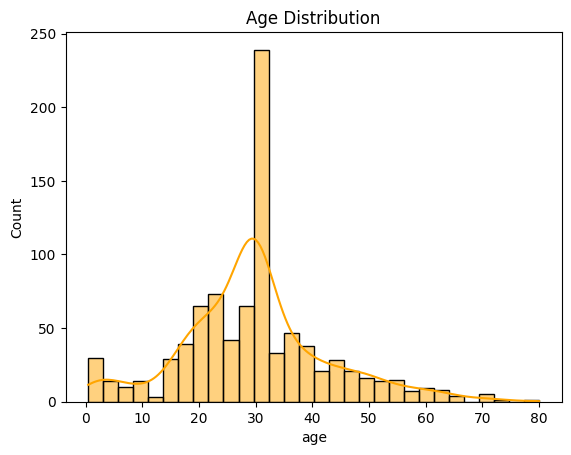

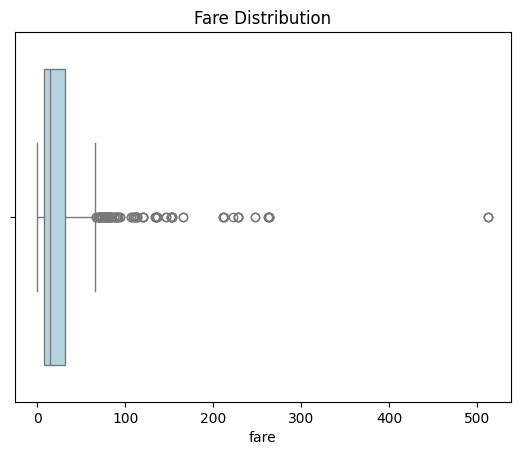

In [16]:
num_cols=df.select_dtypes(include=['int64','float64']).columns
df[num_cols].describe()

sns.histplot(df['age'],bins=30,kde=True,color='orange')
plt.title('Age Distribution')
plt.show()

sns.boxplot(x=df['fare'],color='lightblue')
plt.title('Fare Distribution')
plt.show()

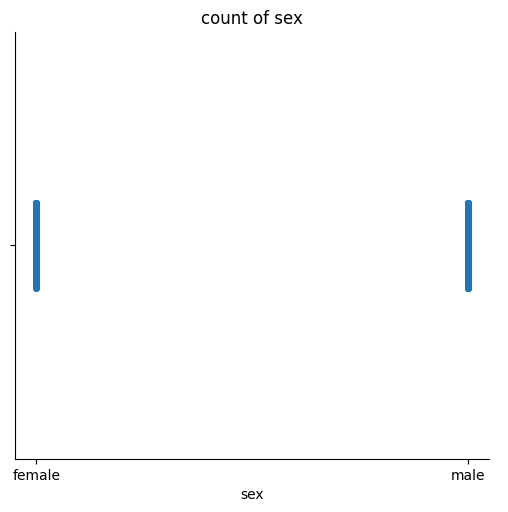

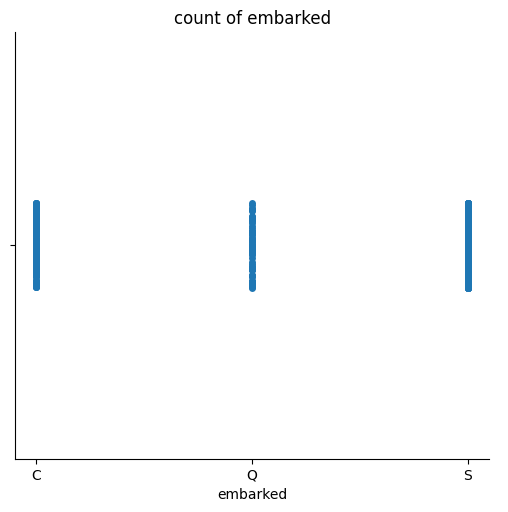

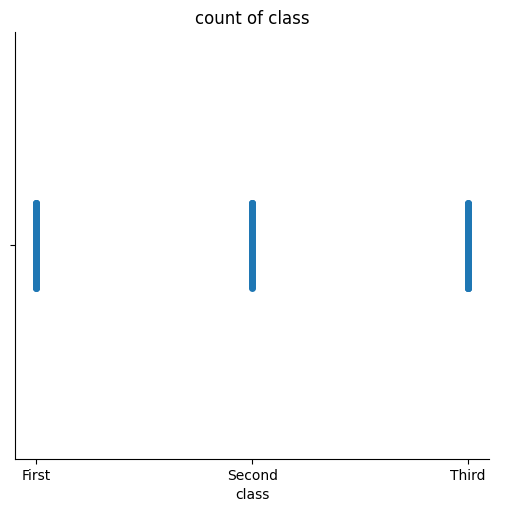

In [17]:
#Univariate analysis - Categorical Features

cat_cols=df.select_dtypes(include=['category']).columns
for col in cat_cols:
    sns.catplot(x=col,data=df)
    plt.title(f'count of {col}')
    plt.show()

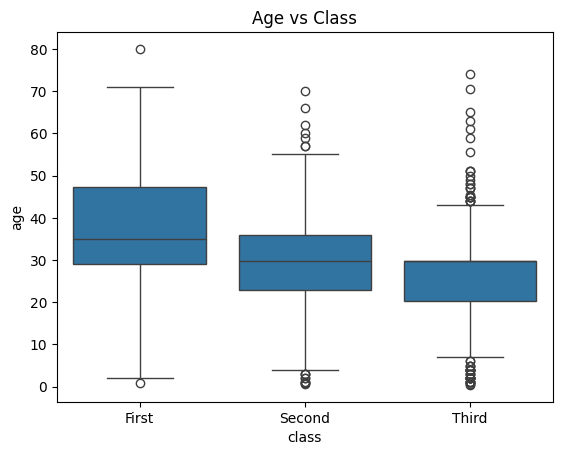

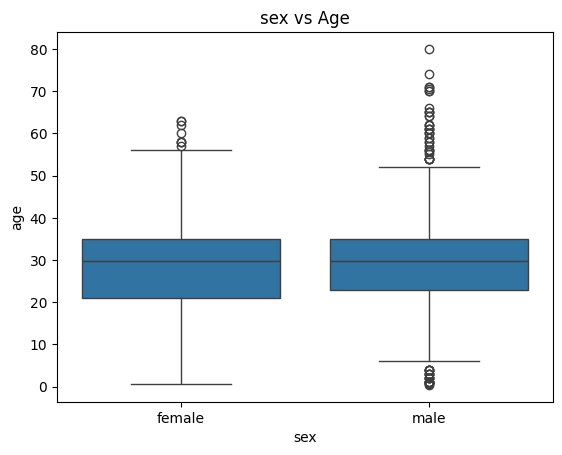

In [19]:
sns.boxplot(x='class',y='age',data=df)
plt.title('Age vs Class')
plt.show()

sns.boxplot(x='sex',y='age',data=df)
plt.title('sex vs Age')
plt.show()

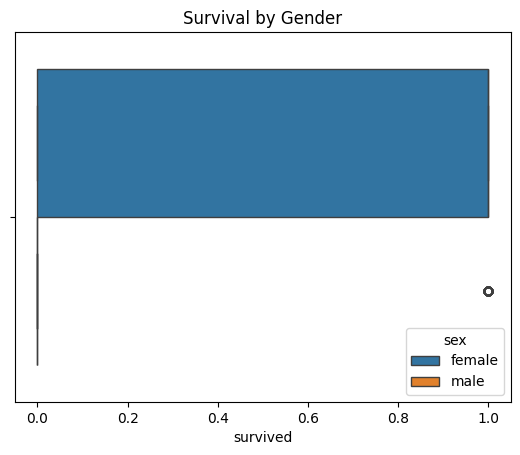

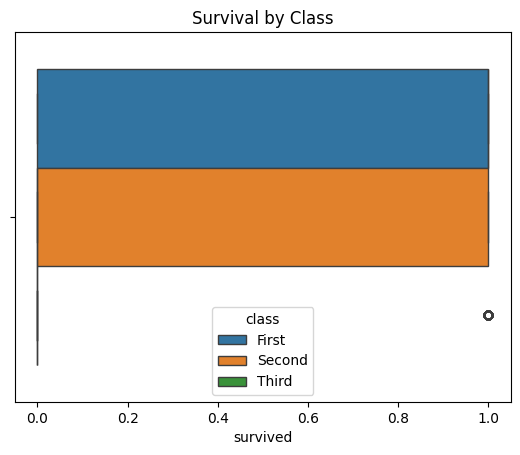

In [20]:
sns.boxplot(x='survived',hue='sex',data=df)
plt.title('Survival by Gender')
plt.show()

sns.boxplot(x='survived',hue='class',data=df)
plt.title('Survival by Class')
plt.show()

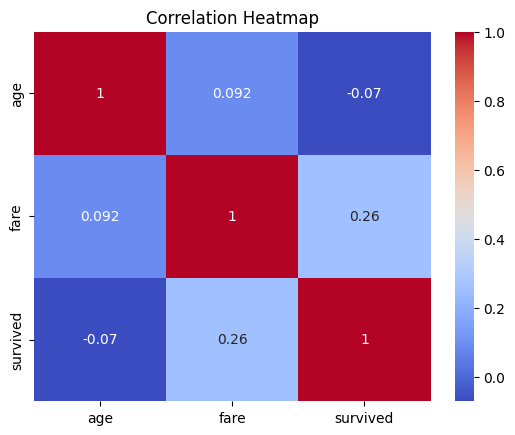

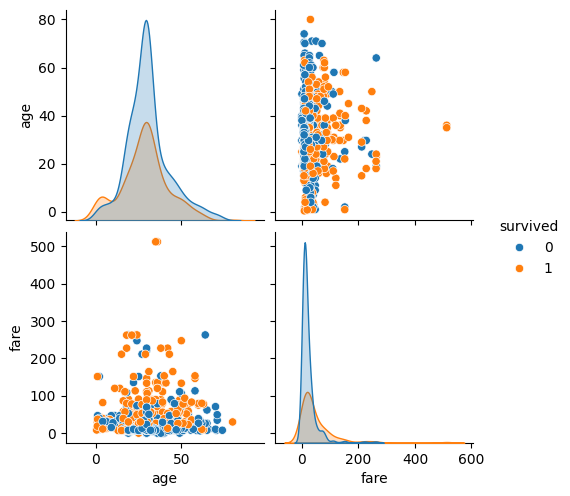

In [24]:
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')

plt.show()

In [32]:
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print("Q1:", q1, "Q3:", q3, "IQR:", iqr, "Lower bound:", lower, "Upper bound:", upper)

outliers = df[(df['fare'] < lower) | (df['fare'] > upper)]
print("Number of outliers in fare:", len(outliers))






Q1: 7.9104 Q3: 31.0 IQR: 23.0896 Lower bound: -26.724 Upper bound: 65.6344
Number of outliers in fare: 116


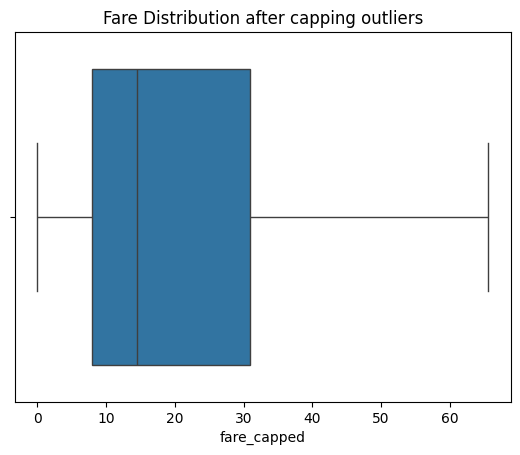

In [31]:
#outliers
df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title('Fare Distribution after capping outliers')
plt.show()

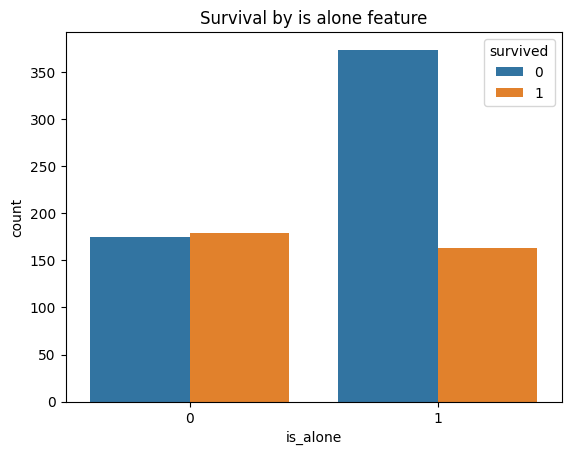

In [35]:
df['family_size']=df['sibsp']+df['parch']+1
df['is_alone']=(df['family_size']==1).astype(int)
sns.countplot(x='is_alone',hue='survived',data=df)
plt.title('Survival by is alone feature')
plt.show()

In [36]:
df.to_csv('titanic_cleaned.csv',index=False)
print("\n Cleaned Titanic data saved as titanic_cleaned.csv")


 Cleaned Titanic data saved as titanic_cleaned.csv


In [ ]:
import os
print(os.get)